# PCA

#### Project Objective: - Compare K-Means clustering results of PCA-transformed data with original dataset.

## Importing libraries

In [1035]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [1037]:
df = pd.read_csv('wine.csv')

## EDA

In [1039]:
df.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [1040]:
df.shape

(178, 14)

In [1041]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [1042]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [1043]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [1044]:
df.duplicated().sum()

0

## Data Visualization

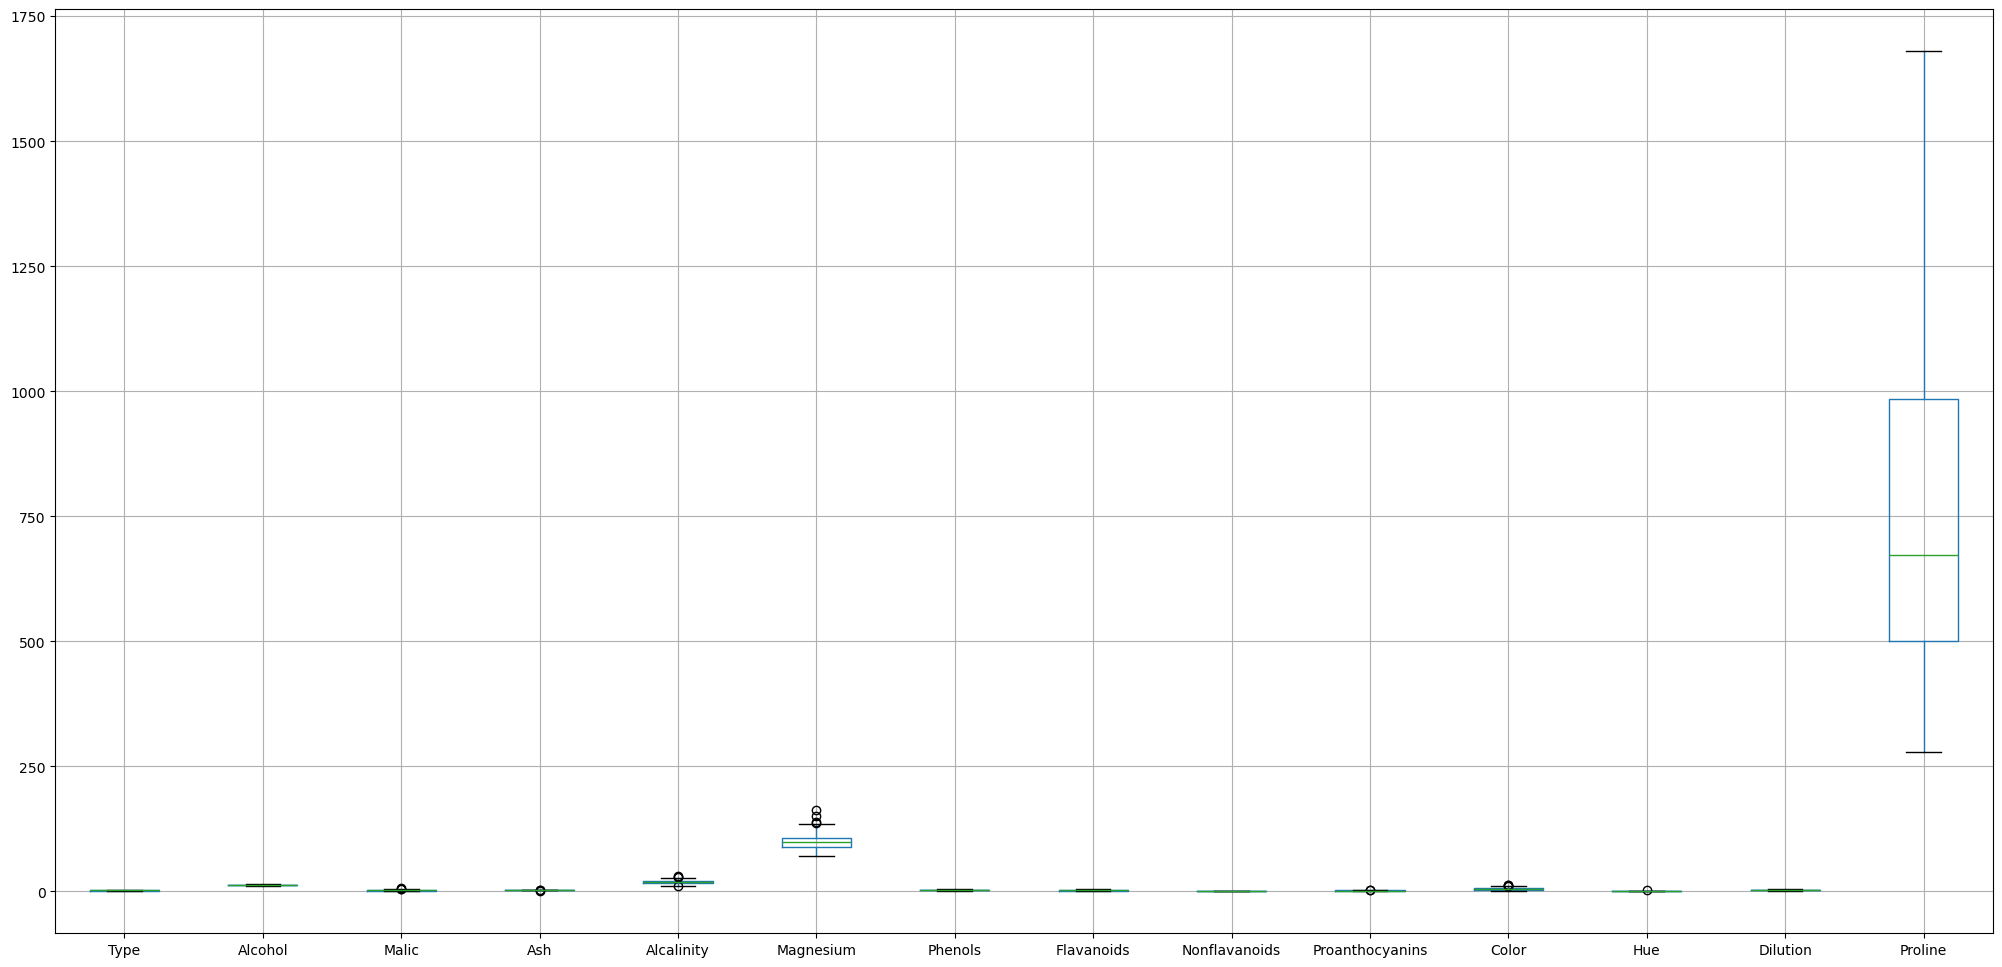

In [1046]:
df.boxplot(figsize = (25,12))
plt.show()

In [1047]:
# From the above boxplot, we can see there are no extreme outliers in the dataset except a few for features like 'Malic','Ash','Alcalinity','Magnesium',
# 'Proanthocyanins','Color' &'Hue'

In [1355]:
# Treating outliers with IQR method

In [1048]:
def outlier_Detection(df,columns): 
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

In [1049]:
outlier_Detection(df,['Malic','Ash','Alcalinity','Magnesium','Proanthocyanins','Color','Hue'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


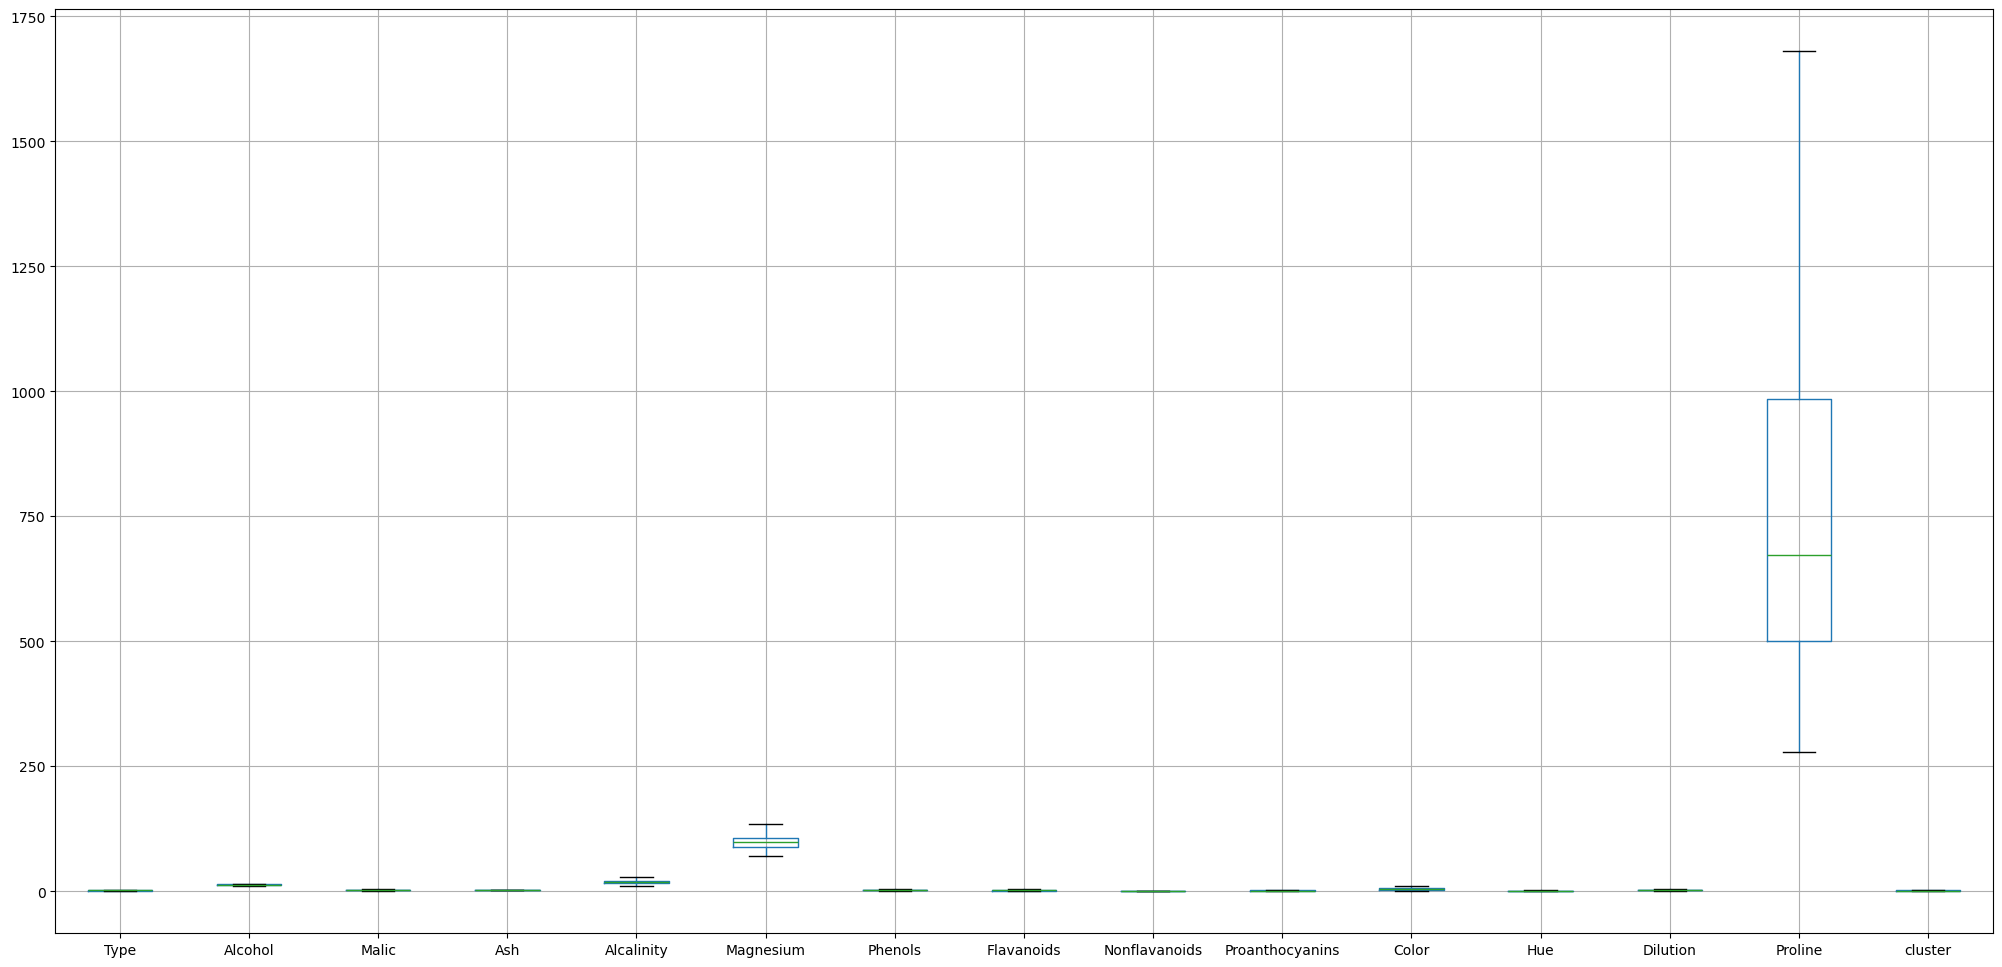

In [1353]:
df.boxplot(figsize = (25,12))
plt.show()

In [1286]:
# Plotting distribution plots for each feature to check normality of dataset and if there is any highly skewed feature. 

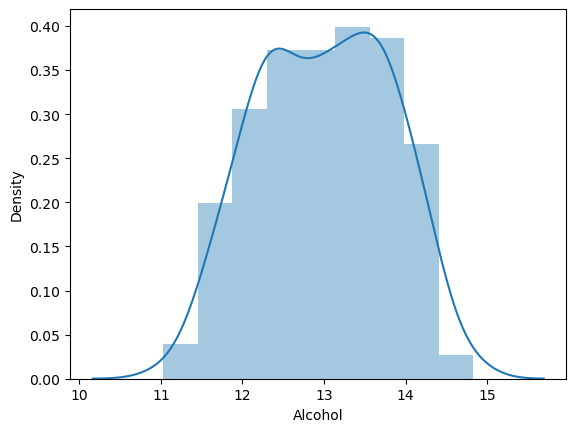

In [1050]:
sns.distplot(df['Alcohol'])
plt.show()

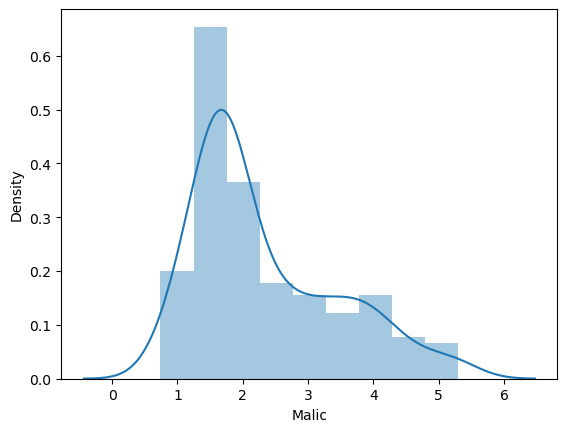

In [1051]:
sns.distplot(df['Malic'])
plt.show()

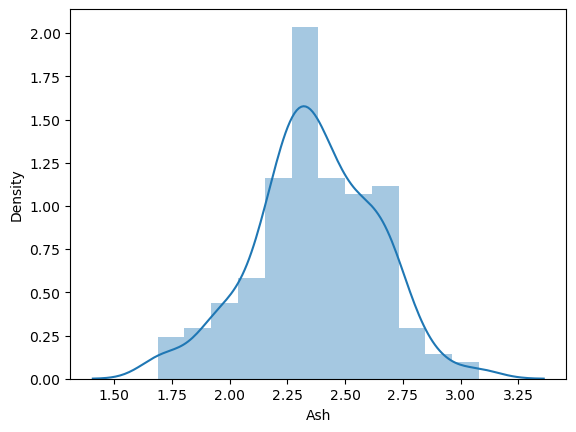

In [1052]:
sns.distplot(df['Ash'])
plt.show()

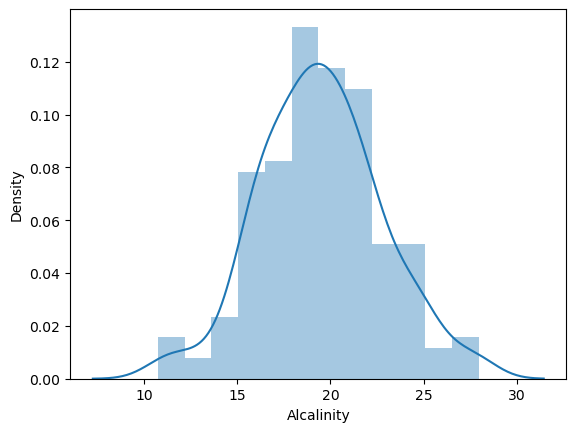

In [1053]:
sns.distplot(df['Alcalinity'])
plt.show()

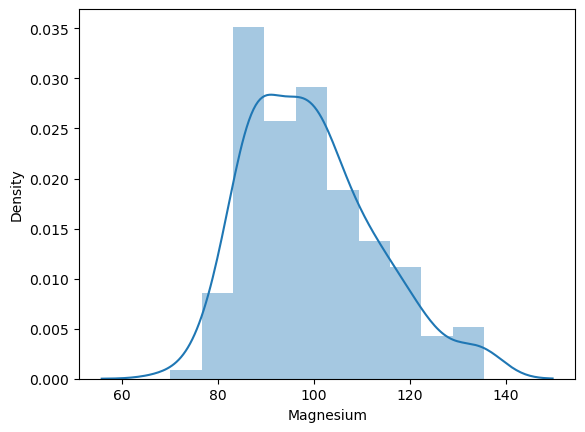

In [1054]:
sns.distplot(df['Magnesium'])
plt.show()

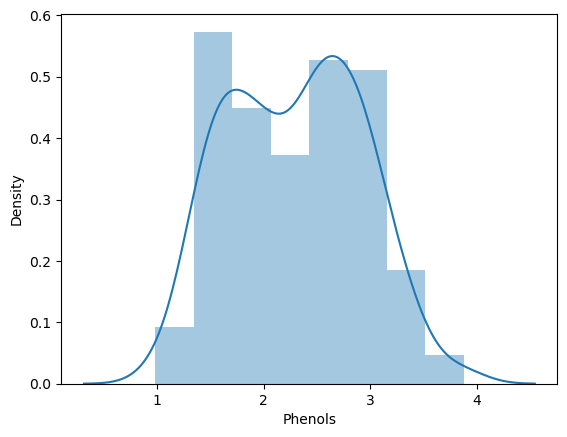

In [1055]:
sns.distplot(df['Phenols'])
plt.show()

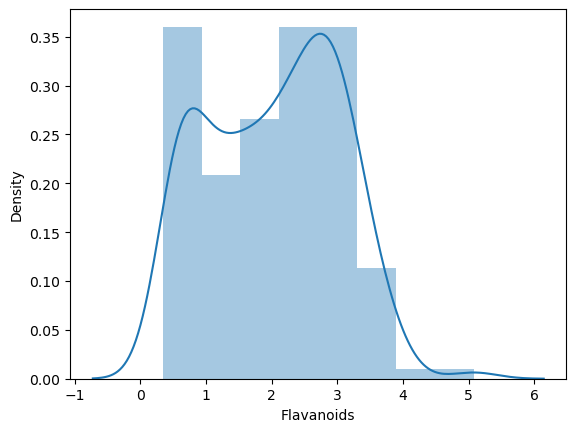

In [1056]:
sns.distplot(df['Flavanoids'])
plt.show()

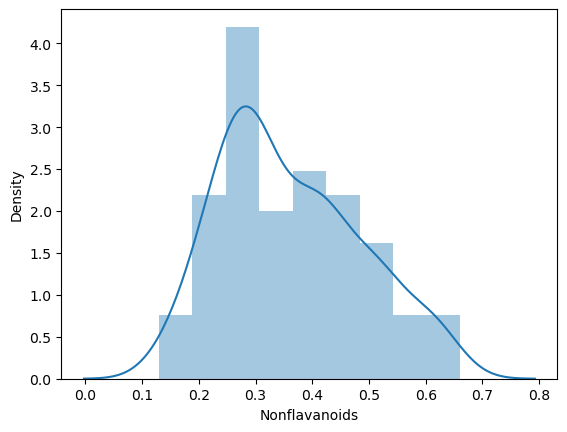

In [1057]:
sns.distplot(df['Nonflavanoids'])
plt.show()

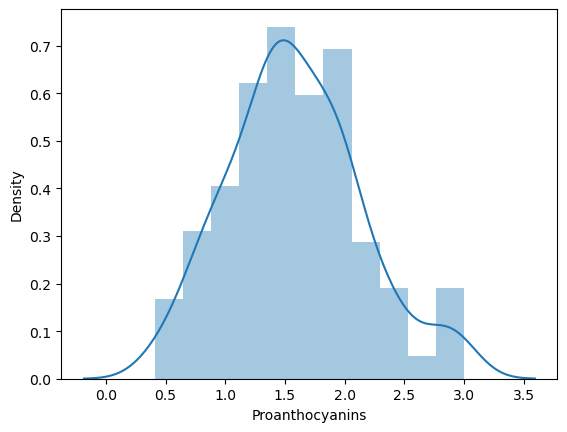

In [1058]:
sns.distplot(df['Proanthocyanins'])
plt.show()

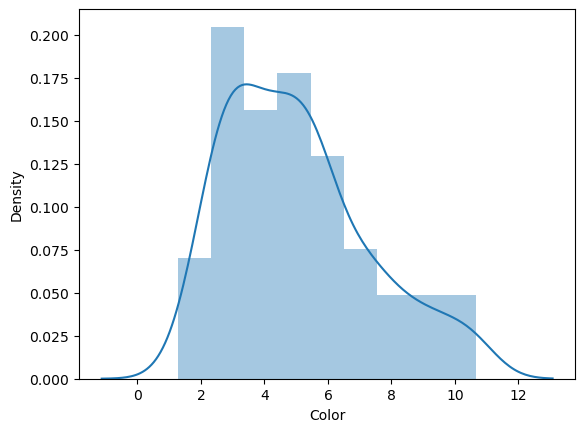

In [1059]:
sns.distplot(df['Color'])
plt.show()

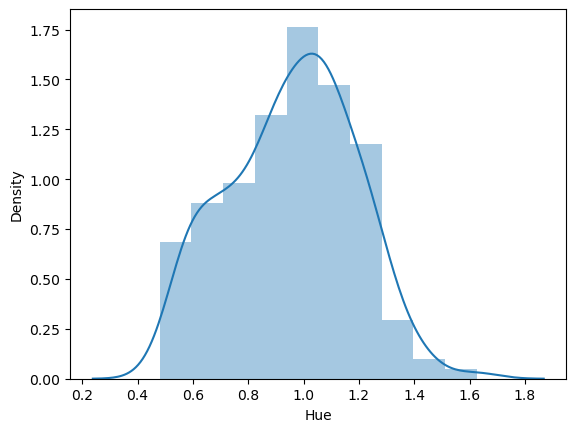

In [1060]:
sns.distplot(df['Hue'])
plt.show()

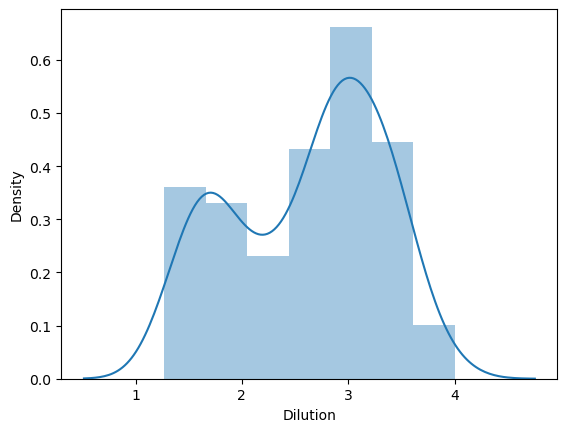

In [1061]:
sns.distplot(df['Dilution'])
plt.show()

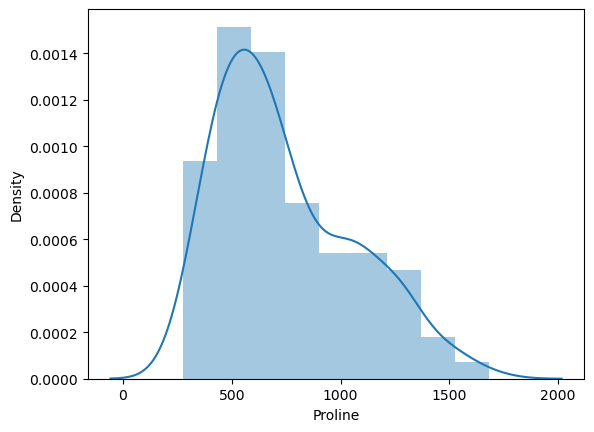

In [1062]:
sns.distplot(df['Proline'])
plt.show()

In [1294]:
# From above distribution plots, we notice that most features in the Wine dataset exhibit near-normal distributions, which suggests that 
# the data is roughly symmetric around the mean, with most values clustered around the center and fewer values in the tails.
# This could possibly be the result of treating outliers before plotting distribution plots. 

In [1288]:
# Checking correlation between features

In [1063]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


In [1064]:
correlation_matrix = df.corr()

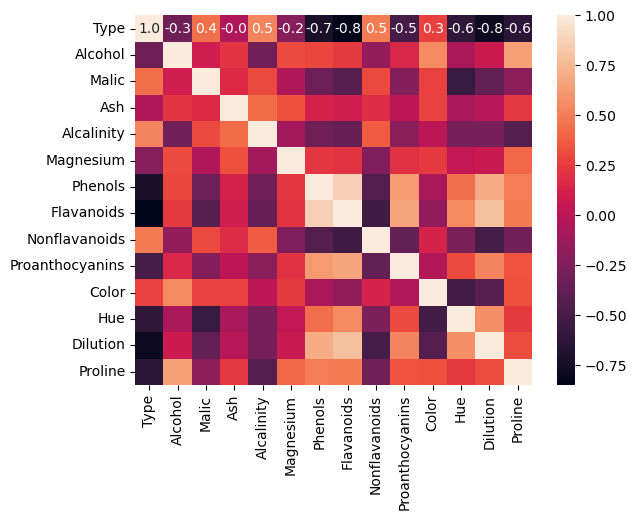

In [1065]:
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')
plt.show()

In [1296]:
# Plotting scatterplots for highly linearly correlated features 

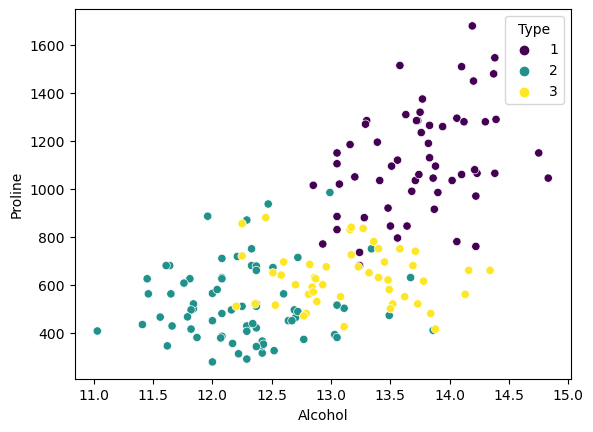

In [1067]:
sns.scatterplot(x='Alcohol',y='Proline',data=df,hue='Type',palette='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()

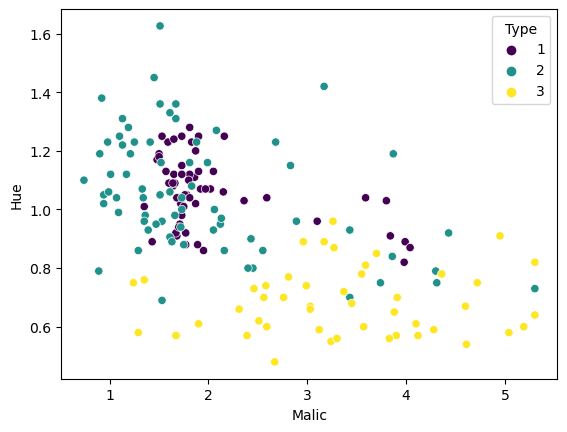

In [1068]:
sns.scatterplot(x='Malic',y='Hue',data=df,hue='Type',palette='viridis')
plt.xlabel('Malic')
plt.ylabel('Hue')
plt.show()

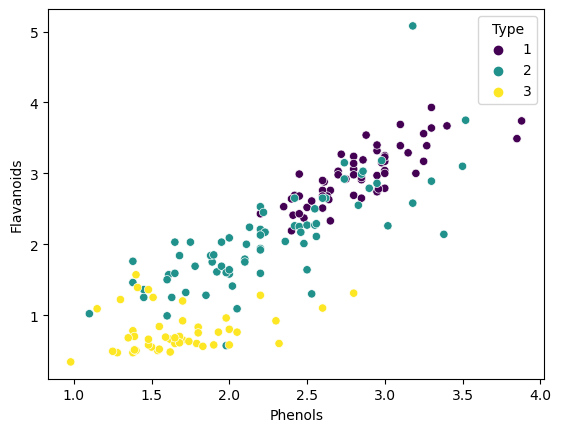

In [1069]:
sns.scatterplot(x='Phenols',y='Flavanoids',data=df,hue='Type',palette='viridis')
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.show()

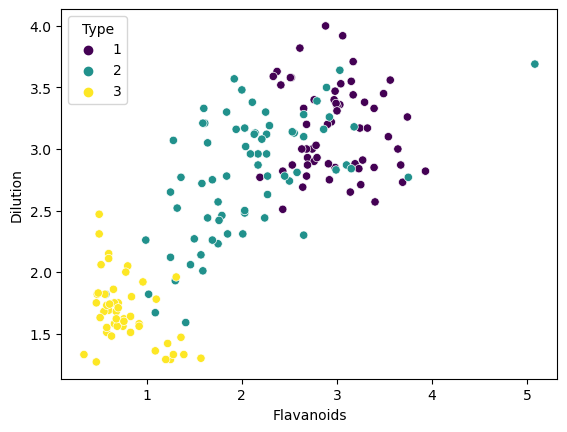

In [1070]:
sns.scatterplot(x='Flavanoids',y='Dilution',data=df,hue='Type',palette='viridis')
plt.xlabel('Flavanoids')
plt.ylabel('Dilution')
plt.show()

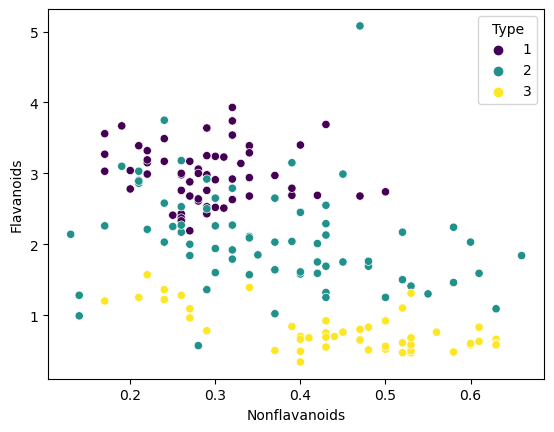

In [1071]:
sns.scatterplot(x='Nonflavanoids',y='Flavanoids',data=df,hue='Type',palette='viridis')
plt.xlabel('Nonflavanoids')
plt.ylabel('Flavanoids')
plt.show()

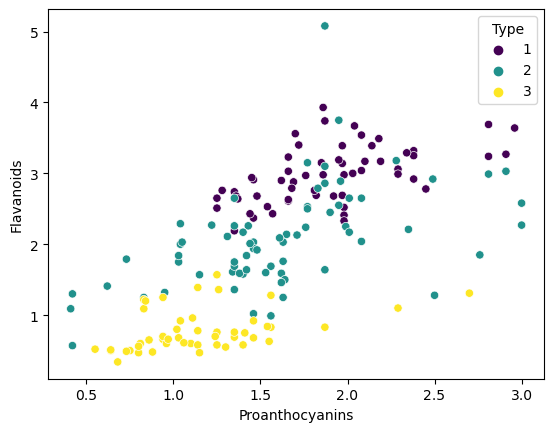

In [1072]:
sns.scatterplot(x='Proanthocyanins',y='Flavanoids',data=df,hue='Type',palette='viridis')
plt.xlabel('Proanthocyanins')
plt.ylabel('Flavanoids')
plt.show()

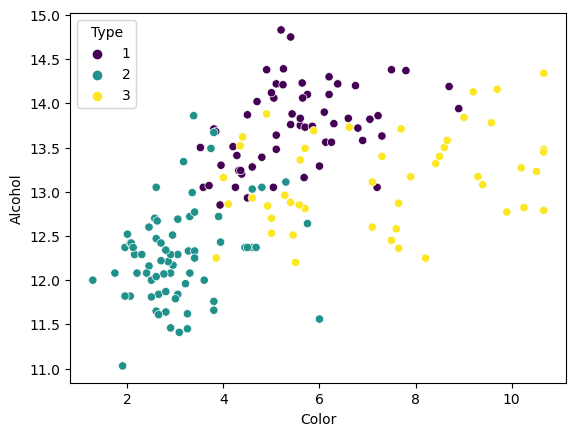

In [1073]:
sns.scatterplot(x='Color',y='Alcohol',data=df,hue='Type',palette='viridis')
plt.xlabel('Color')
plt.ylabel('Alcohol')
plt.show()

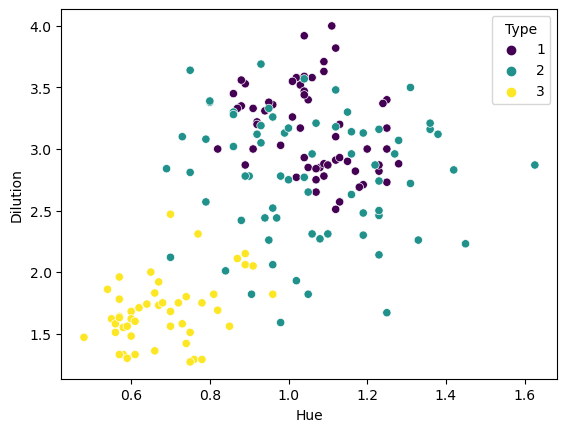

In [1074]:
sns.scatterplot(x='Hue',y='Dilution',data=df,hue='Type',palette='viridis')
plt.xlabel('Hue')
plt.ylabel('Dilution')
plt.show()

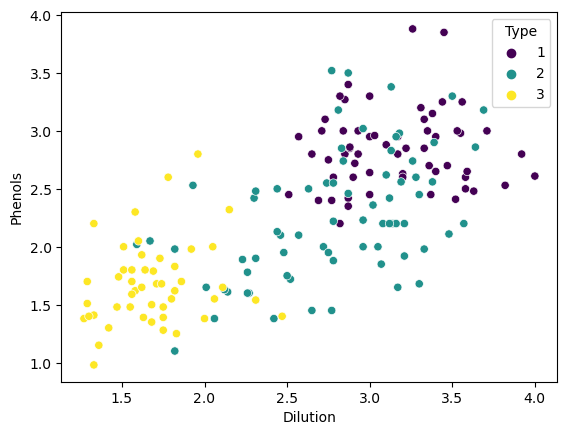

In [1075]:
sns.scatterplot(x='Dilution',y='Phenols',data=df,hue='Type',palette='viridis')
plt.xlabel('Dilution')
plt.ylabel('Phenols')
plt.show()

In [1290]:
# From above scatterplots we can see that there aren't any clear clusters formed based on target variable -> 'Type'

## Standardize features

In [1077]:
x=df.drop(columns=['Type'])
y=df['Type']

In [1078]:
x.shape,y.shape

((178, 13), (178,))

In [1079]:
y.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [1080]:
# We will standardize the dataset as we have different units and a varied range of numbers in all the features. 

In [1081]:
from sklearn.preprocessing import StandardScaler

In [1082]:
# We have a target variable -> 'Type', which shouldn't be scaled along with input features. Using x = sc.fit_transform(df) would scale all columns,
# including the target, which could lead to incorrect interpretations.

# Therefore, we will scale only the independent variables represented by 'x' before applying PCA. 

In [1083]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

## PCA

In [1304]:
from sklearn.decomposition import PCA

In [1306]:
pca = PCA()
pcs = pca.fit_transform(x)

In [1308]:
pcs

array([[ 3.35814747,  1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481, -0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346,  2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

In [1310]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305,0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178,0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484,-0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025,-0.086492,-0.495366,0.353956,0.346681,-0.083471


In [1312]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [1314]:
# Interpretation: In this example, the first principal component explains approximately 36% of the variance in the data, the second explains about 20%,
# and so on. 

In [1316]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

#### Bar plot to visualize number of Principal Components

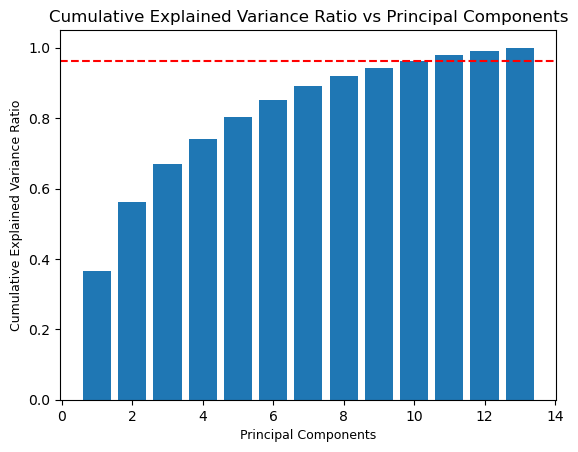

<Figure size 2500x1200 with 0 Axes>

In [1337]:
plt.bar(np.arange(1, 14),cumulative_variance)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize = 9)
plt.xlabel('Principal Components',fontsize = 9)
plt.title('Cumulative Explained Variance Ratio vs Principal Components',fontsize = 12)
plt.axhline(y=0.9611, linestyle = '--', color = 'red')
plt.figure(figsize=(25,12))
plt.show()

In [1320]:
# Cumulative Explained Variance plot shows that first 10 principal components capture 96.11% of the total variance.

In [1322]:
# Let's use Scree plot to identify optimum number of principal components to use. 

In [1324]:
# A Scree Plot is a graphical tool used to determine the optimal number of principal components or factors to retain in dimensionality reduction 
# techniques like PCA. It helps visualize the explained variance by each component and identify the "elbow point" where the explained variance 
# starts to level off.

#### Scree Plot

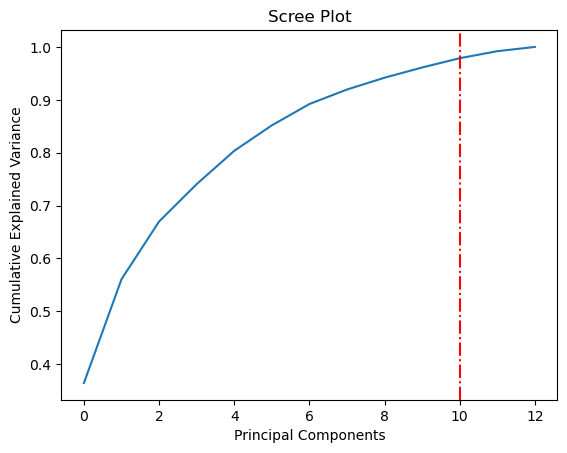

In [1339]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axvline(x=10,linestyle = '-.', color = 'red')
plt.show()

In [1341]:
# From above Scree plot, we can see that after first 10 principal components, values are almost constant for Cumulative Explained Variance. 

# Also, from above Cumulative Explained Variance array we can see that first 10 principal components capture 96.11% of the total variance.

# Therefore, optimal number of principal components = 10

In [1343]:
pca = PCA(n_components=10)
pcs = pca.fit_transform(x)
pcs

array([[ 3.35814747,  1.52022185, -0.12637492, ...,  0.01918672,
        -0.6892566 , -1.03120871],
       [ 2.22921481, -0.33326137, -2.04283756, ...,  0.9916492 ,
         0.37966369, -0.20878677],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.46440095,
         1.16475457, -0.13653812],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ...,  0.01348408,
        -0.02068873,  0.26726251],
       [-2.37160346,  2.39380794, -0.56148477, ...,  0.35102538,
        -0.08649189, -0.49536603],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.2033248 ,
        -0.72139851,  0.1784193 ]])

## Clustering Analysis using K-Means on Original dataset

In [1101]:
from sklearn.cluster import KMeans

In [1102]:
from sklearn.metrics import silhouette_score

In [1103]:
# Applying K-Means to the original dataset

In [1104]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


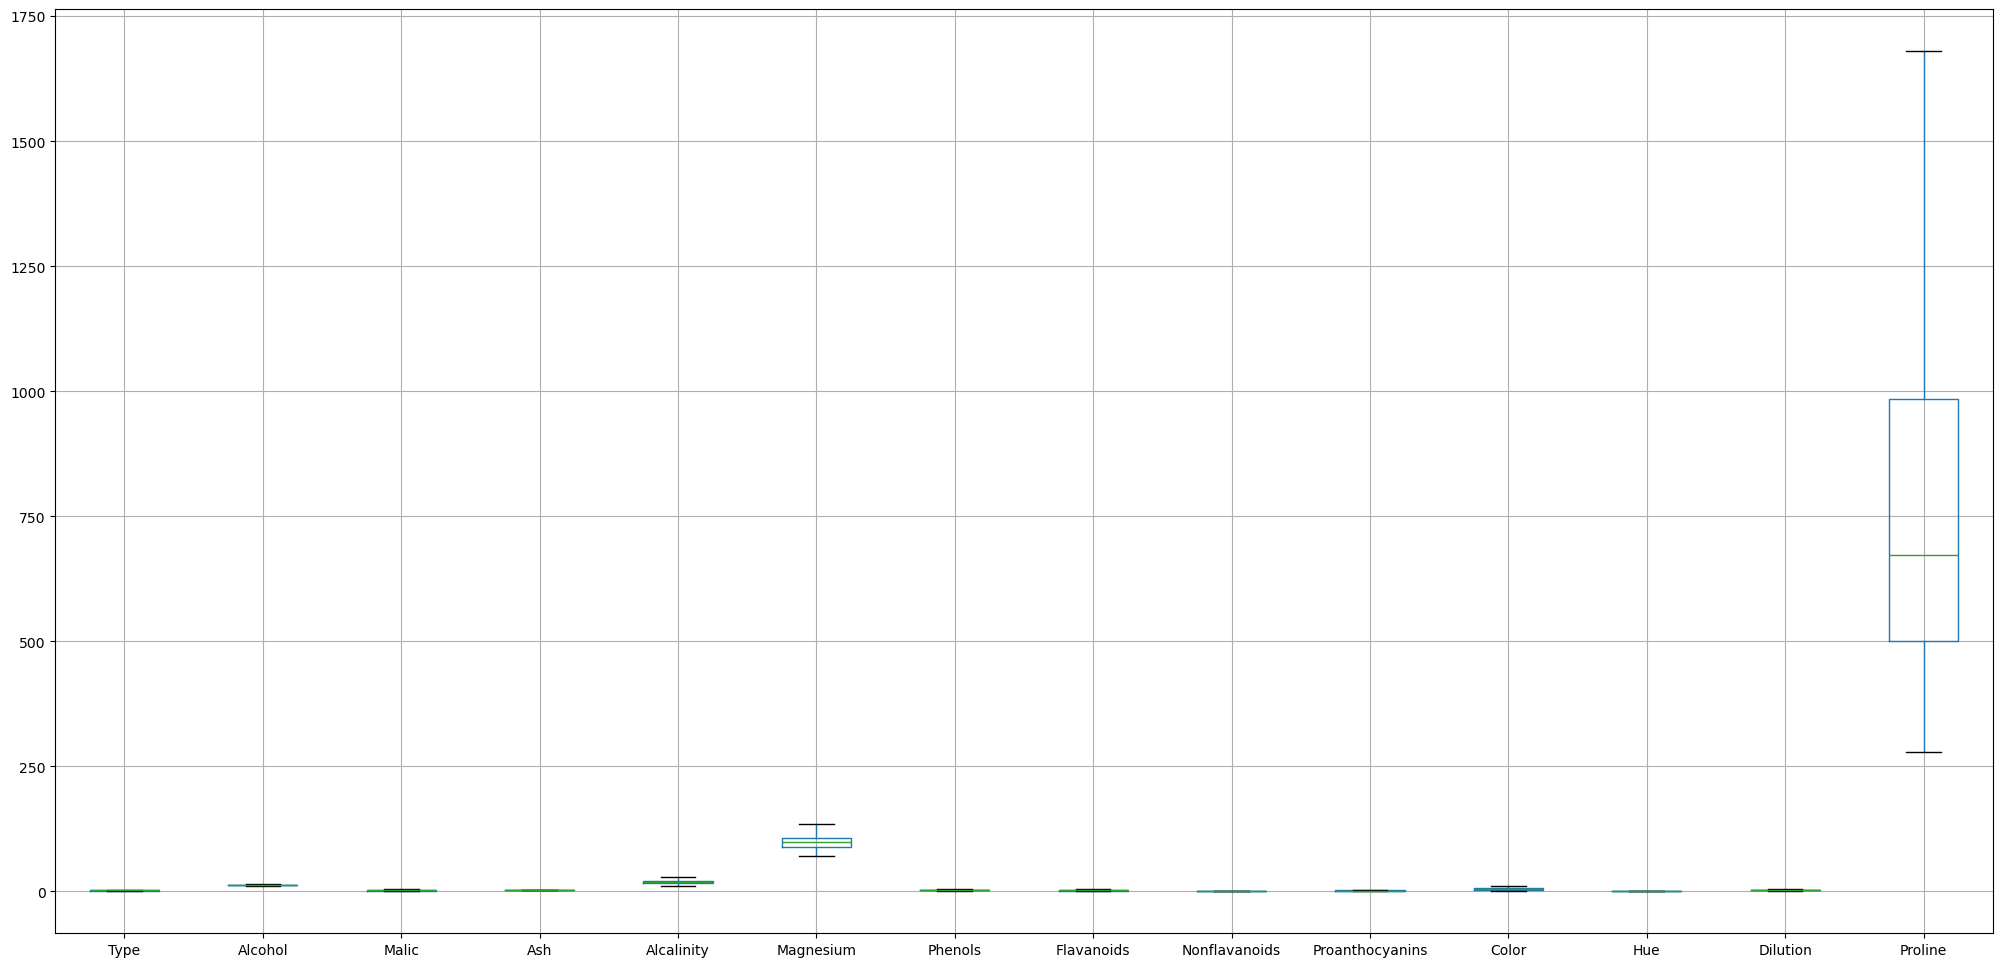

In [1105]:
df.boxplot(figsize = (25,12))
plt.show()

In [1106]:
# As we have already treated the outliers, we see no extreme outliers in the boxplot and can continue with further analysis. 

## Standardizing Features

In [1108]:
x=df.drop(columns=['Type'])
y=df['Type']

In [1109]:
x.shape,y.shape

((178, 13), (178,))

In [1110]:
sc=StandardScaler()

x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [1111]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [1112]:
# Using Elbow Graph to identify optimum number of clusters that can be achieved. 

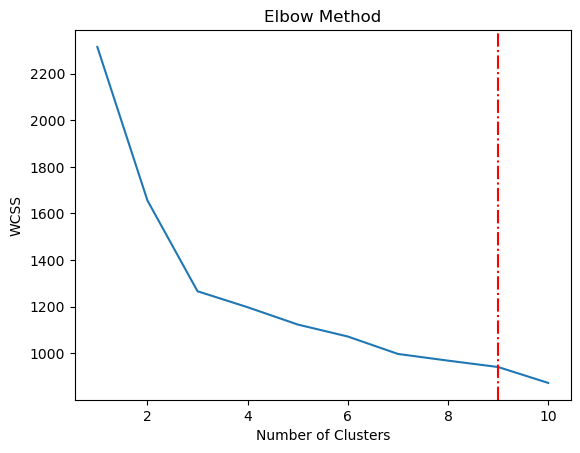

In [1113]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.axvline(x = 9, linestyle = '-.', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [1114]:
# From above elbow graph, let's experiment with number of clusters, k = 9

In [1115]:
km = KMeans(n_clusters=9)
y_pred = km.fit_predict(x)
y_pred

array([7, 7, 3, 3, 7, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7,
       7, 7, 7, 8, 7, 7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 7, 3, 7, 3, 3, 6, 6, 6, 2, 2, 5, 2,
       2, 2, 6, 0, 1, 8, 2, 7, 2, 6, 2, 6, 0, 8, 2, 2, 5, 4, 8, 2, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 0, 1, 2, 2, 0, 2, 2, 8, 2, 2, 5, 2, 5, 2, 8,
       0, 2, 5, 5, 5, 5, 2, 2, 6, 2, 8, 8, 8, 8, 8, 2, 8, 5, 8, 8, 1, 1,
       1, 1, 6, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4])

In [1116]:
df['cluster'] = y_pred
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,7
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,7
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,4
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,4
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,4
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,4


In [1117]:
df['cluster'].value_counts()

cluster
4    35
7    31
3    27
2    27
5    16
1    15
8    14
6     8
0     5
Name: count, dtype: int64

In [1118]:
silhouette_score(x,y_pred)

0.13799077114181638

In [1119]:
# As we achieved a very low silhouette score of 0.1379, we will experiment further with number of clusters. 

In [1120]:
df.drop(columns=['cluster'],inplace=True)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [1121]:
# let's experiment with number of clusters, k = 5

In [1122]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(x)
y_pred

array([4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 1, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 3, 4, 4, 3, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 3, 3, 0, 1,
       3, 3, 0, 3, 0, 1, 0, 1, 1, 3, 3, 0, 3, 1, 3, 3, 0, 2, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 3, 0, 0, 0, 0, 3, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [1123]:
df['cluster'] = y_pred
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [1124]:
df['cluster'].value_counts()

cluster
2    50
4    44
3    37
0    26
1    21
Name: count, dtype: int64

In [1125]:
silhouette_score(x,y_pred)

0.197331852217601

In [1126]:
# We see a slightly increased silhouette score with reduced number of clusters, k = 5, but is still a relatively low score. 

In [1127]:
df.drop(columns=['cluster'],inplace=True)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [1128]:
# Observing the elbow point from the elbow graph, let's experiment with k = 3

In [1129]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [1130]:
df['cluster'] = y_pred
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [1131]:
df['cluster'].value_counts()

cluster
0    65
1    62
2    51
Name: count, dtype: int64

In [1132]:
silhouette_score(x,y_pred)

0.2854626783251893

In [1133]:
# We achieved a better silhouette_score of 0.2854 with k = 3. We oberved that with reduced number of clusters, we are achieving improved 
# silhouette score. Looking at the elbow graph, the value of wcss falls sharply until k = 3 and therefore we wouldn't experiment further with 
# lesser number of clusters. 

#### Visualizing clustering results on original dataset using Scatterplots for k = 3

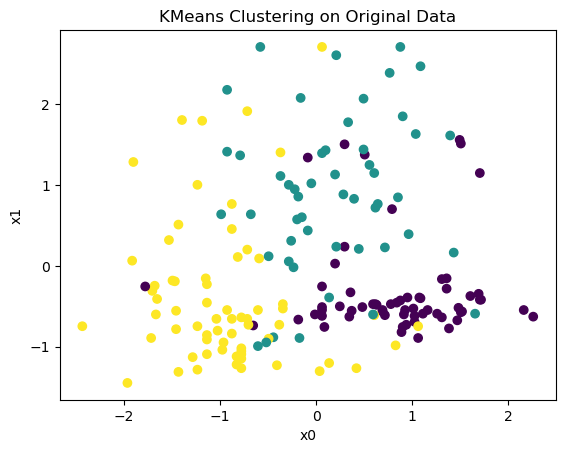

In [1278]:
plt.scatter(x[:, 0], x[:, 1], c=df['cluster'])
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("KMeans Clustering on Original Data")
plt.show()

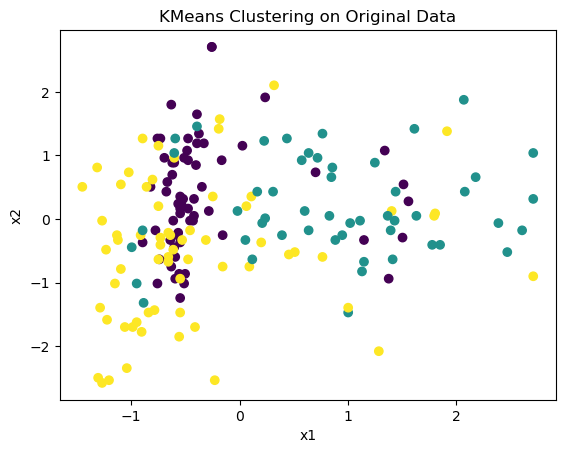

In [1280]:
plt.scatter(x[:, 1], x[:, 2], c=df['cluster'])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("KMeans Clustering on Original Data")
plt.show()

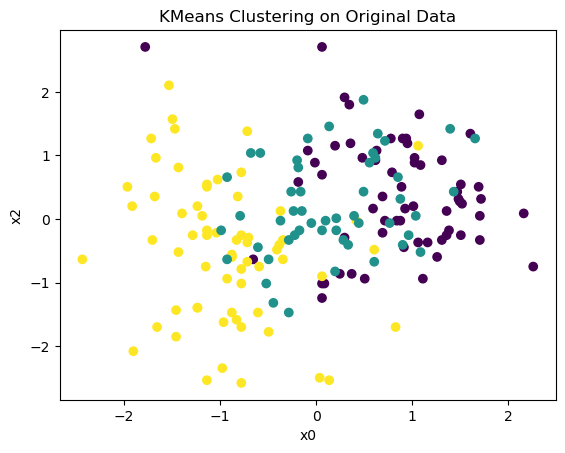

In [1282]:
plt.scatter(x[:, 0], x[:, 2], c=df['cluster'])
plt.xlabel("x0")
plt.ylabel("x2")
plt.title("KMeans Clustering on Original Data")
plt.show()

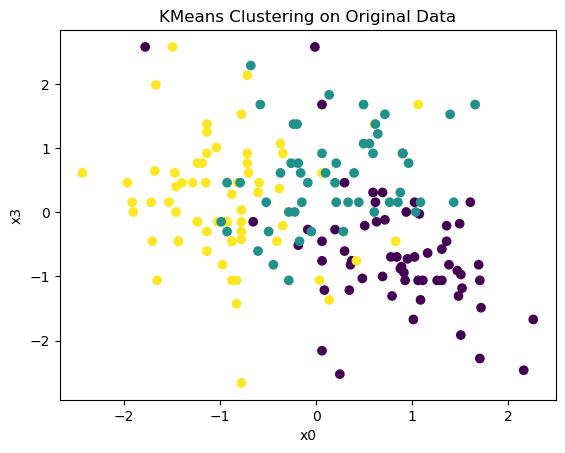

In [1284]:
plt.scatter(x[:, 0], x[:, 3], c=df['cluster'])
plt.xlabel("x0")
plt.ylabel("x3")
plt.title("KMeans Clustering on Original Data")
plt.show()

## K-Means on PCA transformed dataset

In [1244]:
kmeans = KMeans(n_clusters=3) # Applying the same number of clusters as for original dataset which achieved best silhouette scores results. 
clusters = kmeans.fit_predict(pcs)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [1246]:
df['cluster'] = clusters
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [1276]:
pcs.shape

(178, 10)

#### Visualizing clustering results on PCA transformed data using Scatterplots for k = 3

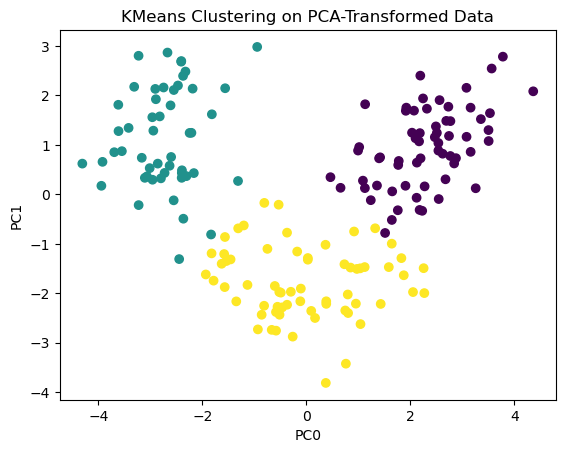

In [1248]:
plt.scatter(pcs[:, 0], pcs[:, 1], c=df['cluster'])
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("KMeans Clustering on PCA-Transformed Data")
plt.show()

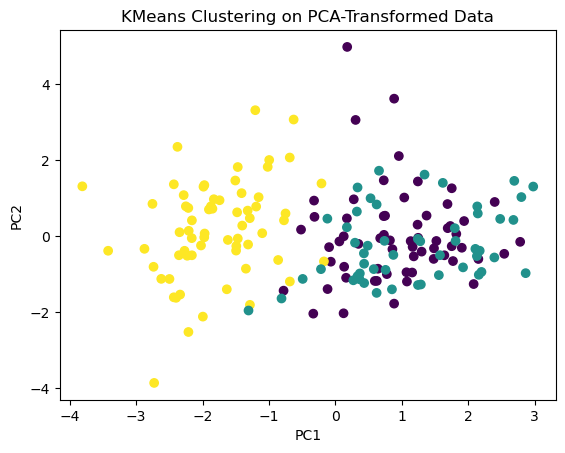

In [1250]:
plt.scatter(pcs[:, 1], pcs[:, 2], c=df['cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering on PCA-Transformed Data")
plt.show()

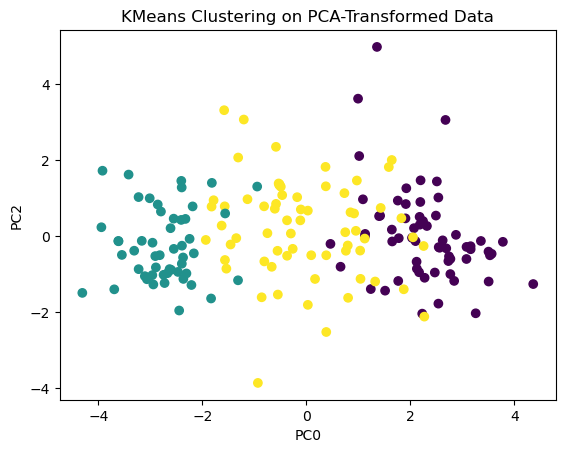

In [1252]:
plt.scatter(pcs[:, 0], pcs[:, 2], c=df['cluster'])
plt.xlabel("PC0")
plt.ylabel("PC2")
plt.title("KMeans Clustering on PCA-Transformed Data")
plt.show()

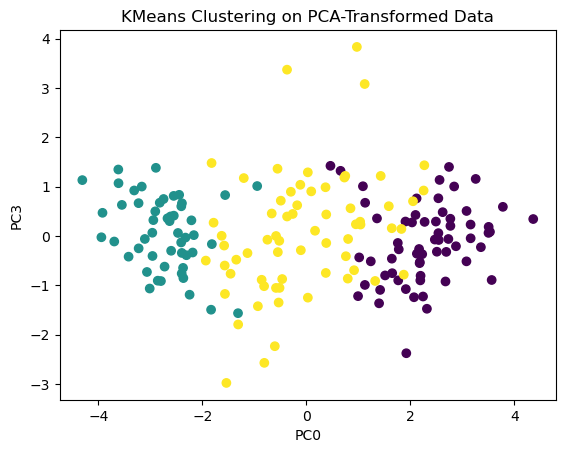

In [1260]:
plt.scatter(pcs[:, 0], pcs[:, 3], c=df['cluster'])
plt.xlabel("PC0")
plt.ylabel("PC3")
plt.title("KMeans Clustering on PCA-Transformed Data")
plt.show()

In [1270]:
df['cluster'].value_counts()

cluster
2    65
0    62
1    51
Name: count, dtype: int64

In [1272]:
silhouette_score(pcs,clusters)

0.29924068448082314

## Comparison & Analysis

#### 1. We can see that we achieved a silhouette score of 0.2992 on PCA transformed data which is better than that achieved on original dataset. 
#### 2. Also, PCA transformed dataset provided a clear and better division of clusters based on the 'Type' variable as compared to the clusters created on original dataset. 


#### 3. Analyzing trade-offs between using PCA and Clustering directly on original dataset: - 

#####    Clustering directly on the original dataset:

######    Advantages:
######    a. Clustering on the original data uses all available features, potentially capturing more nuanced patterns and relationships.
######    b. Avoids the potential loss of information that can occur during dimensionality reduction with PCA.

######    Disadvantages:
######    a. High-dimensional data can lead to increased computational complexity and decreased performance for many clustering algorithms.
######    b. Irrelevant or redundant features can negatively impact clustering results, leading to less meaningful clusters.
######    c. Visualizing clusters in high-dimensional spaces can be challenging.

#####    Using PCA before clustering:

######    Advantages:

######    a. Reduces the number of features, potentially improving clustering performance and computational efficiency.
######    b. Can filter out noise and irrelevant information by focusing on the principal components that capture the most variance.
######    c. Makes it easier to visualize clusters in a lower-dimensional space.

######    Disadvantages:

######    a. PCA can lead to some loss of information, potentially discarding features that might be relevant for clustering.
######    b. PCA is sensitive to the scale of features, requiring careful preprocessing (e.g., standardization) to avoid bias.


## CONCLUSION

#### The original dataset had fewer outlier data points and most of the features exhibit near-normal distribution. Most of the features are moderately linearly correlated to atleast one other feature. Moderate correlation suggests that some features might be capturing similar information or representing overlapping aspects of the data. This can lead to redundancy in the feature set. Dimensionality reduction techniques like PCA proved to be effective in reducing redundancy and creating a smaller set of uncorrelated features (principal components) that captured most of the variance (96.11%) in the data and provided better division of clusters. 